<a href="https://colab.research.google.com/github/caropilardiaz/Challenge/blob/main/ZX_DS_technical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Science Technical Case**##


---



-AB InBev, ZX Ventures, Global Investment and Innovation Group

-ZX Ventures: ze-code Case.

-CASE: :WallMart recruiting Store Sales Forecating

-Díaz,Carolina Del Pilar. cdiaz@piconsulting.com.ar

**Store Sales Forecasting & Discount Strategy**

Goal:

-Exploratory Data Analysis to describe and clean the data, and to understand attributes

-Feature selection to keep only important attributes

-Developing a framework to evaluate and spot-check algorithms

-Predicting and explaining future sales

-Identifying the right time for discount strategies

##Table of Contents##
1-Introduction

2-Data loading

3-EDA

4-Preprosesing and Feature engineering

5_Evaluate Algorithm




#1.Introduction

Following provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.



#2. Data Loading, Preparation and Cleaning

##2.1.Import Library

In [ ]:
# Importing all the libraries
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
import os

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

##2.2.Import dataset

The dataset contain the three files in the csv format:

features.csv:

train.csv :

stores.csv :


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_DIRECTORY = '/content/drive/My Drive/challenge/data_zx'

In [ ]:
features = pd.read_csv(os.path.join(DATA_DIRECTORY,'features.csv'),decimal=".",sep=",")
train = pd.read_csv(os.path.join(DATA_DIRECTORY,'train.csv'),decimal=".",sep=",")
stores = pd.read_csv(os.path.join(DATA_DIRECTORY,'stores.csv'),decimal=".",sep=",")
test = pd.read_csv(os.path.join(DATA_DIRECTORY,'stores.csv'),decimal=".",sep=",")

In [ ]:
# # Finding the number of rowns and columns in dataframe
print (train.shape, stores.shape, features.shape,test.shape)


(421570, 5) (45, 3) (8190, 12) (45, 3)


In [ ]:
#features.csv in dataframe
features = '/content/drive/My Drive/challenge/data_zx/features.csv'
data_features = pd.read_csv(features, sep=',')
data_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,False
1,1,2010-02-12,38.510,2.548,nan,nan,nan,nan,nan,211.242,8.106,True
2,1,2010-02-19,39.930,2.514,nan,nan,nan,nan,nan,211.289,8.106,False
3,1,2010-02-26,46.630,2.561,nan,nan,nan,nan,nan,211.320,8.106,False
4,1,2010-03-05,46.500,2.625,nan,nan,nan,nan,nan,211.350,8.106,False


In [ ]:
data_features.shape

(8190, 12)

In [ ]:
data_features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

features.csv: this file 8190 rows and 12 columns. This file again has some further information regarding the stores and the region in which a particular store is located. It has date, temperature, fuel price, consumer price index, unemployment rate information for the region in which a particular store is located. It also has 5 columns MarkDown1-5 which corresponds to some promotional activities going on in different stores.

In [ ]:
#train.csv in dataframe
train = '/content/drive/My Drive/challenge/data_zx/train.csv'
data_train = pd.read_csv(train, sep=',')
data_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.500,False
1,1,1,2010-02-12,46039.490,True
2,1,1,2010-02-19,41595.550,False
3,1,1,2010-02-26,19403.540,False
4,1,1,2010-03-05,21827.900,False


In [ ]:
data_train.shape

(421570, 5)

In [ ]:
data_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

train.csv : this file has 421570 rows and 5 columns. The columns contain the information for a store, department, date, weekly sales and whether a particular week is a holiday week or not

In [ ]:
#test.csv
test = '/content/drive/My Drive/challenge/data_zx/test.csv'
data_test = pd.read_csv(test, sep=',')
data_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
data_test.shape

(115064, 4)

test.csv : this file has 115064 rows and 4 columns. The columns contain the information for a store, department, date,  and whether a particular week is a holiday week or not

#3. Explore the Data (EDA)




##3.1.Data Cleaning
Let's start by cleaning the data of both datasets. We will see if they have missing values, duplicates and see if eliminate them if thats the case.

Very important to take into account that both datasets are going to merge. Therefore, they must have one key column that has the same values. Hence, We will also see if the values are consistent in both datasets.

In [ ]:
feature_store = data_features.merge(stores, how='inner', on = "Store")

In [ ]:
data_train =data_train.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [ ]:
data_test =data_test.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [ ]:
# Another useful step is to facilate the acces to the 'Date' attribute by splitting it into its componenents (i.e. Year, Month and week,day).
data_train = data_train.copy()
data_test = data_test.copy()

data_train['Date'] = pd.to_datetime(data_train['Date'])
data_train['Year'] = pd.to_datetime(data_train['Date']).dt.year
data_train['Month'] = pd.to_datetime(data_train['Date']).dt.month
data_train['Week'] = pd.to_datetime(data_train['Date']).dt.week
data_train['Day'] = pd.to_datetime(data_train['Date']).dt.day
data_train.replace({'A': 1, 'B': 2,'C':3},inplace=True)

data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test['Year'] = pd.to_datetime(data_test['Date']).dt.year
data_test['Month'] = pd.to_datetime(data_test['Date']).dt.month
data_test['Week'] = pd.to_datetime(data_test['Date']).dt.week
data_test['Day'] = pd.to_datetime(data_test['Date']).dt.day
data_test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [ ]:
print(data_train.head())
print("------------------------------------------------------------\n")
print(data_test.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05     24924.500      False       42.310       2.572   
1      1     2 2010-02-05     50605.270      False       42.310       2.572   
2      1     3 2010-02-05     13740.120      False       42.310       2.572   
3      1     4 2010-02-05     39954.040      False       42.310       2.572   
4      1     5 2010-02-05     32229.380      False       42.310       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5     CPI  \
0        nan        nan        nan        nan        nan 211.096   
1        nan        nan        nan        nan        nan 211.096   
2        nan        nan        nan        nan        nan 211.096   
3        nan        nan        nan        nan        nan 211.096   
4        nan        nan        nan        nan        nan 211.096   

   Unemployment  Type    Size  Year  Month  Week  Day  
0         8.106     1  151315  2010      2     5    5  
1   

##3.2.Descriptive statistics and data visualizations:

**Weekly_Sales**

The plot makes the right skewness clear, so most weeks have sales around the median. Also, we can see that the Weekly_Sales attribute has a large kurtosis which indicates the presence of extreme values, in other words, some weeks have high sales. It would be a good idea to know the origins of these extreme values.

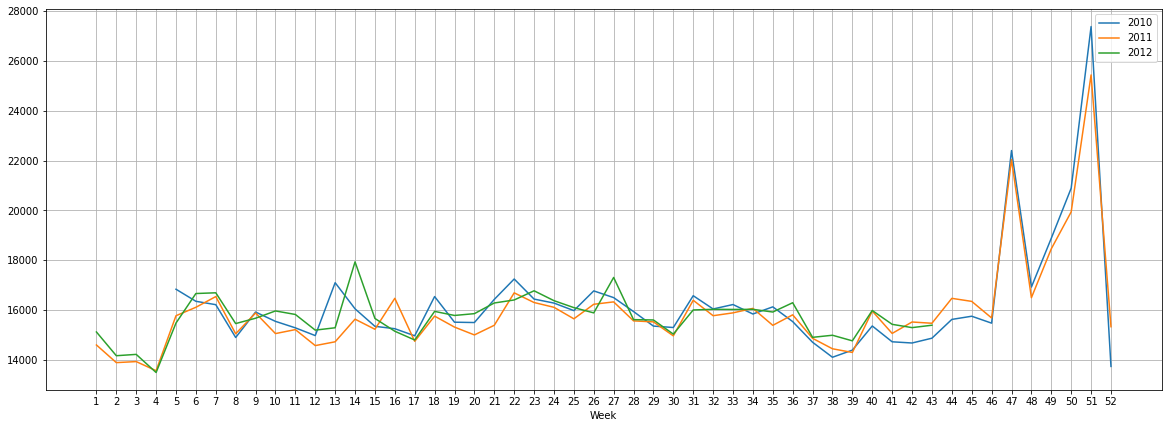

In [ ]:
weekly_sales = data_train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 =data_train.loc[data_train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 =data_train.loc[data_train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 =data_train.loc[data_train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

**Holidays vs NonHolidays Sales**


Only 7 percent of the weeks in the data are the holiday weeks

Despite being the less peecentage of holiday weeks the sales in the holidays week are on the average higher than in the non-holiday weeks


In [ ]:
holiday_sales = data_train.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = data_train.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)
fig.show()

In [ ]:
#Select target
Y_train =data_train['Weekly_Sales']

In [ ]:
targets = Y_train.copy()

In [ ]:
data_train=data_train.drop(['Weekly_Sales'],axis=1)

In [ ]:
# Let's also identify the numeric and categorical columns.
numeric_cols = data_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data_train.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)
print("------------------------------------------------------------\n")
print(categorical_cols)

['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'Day']
------------------------------------------------------------

[]


#4.Preprocessing and Feature Engineering

##4.1.Missing Values

In [ ]:
# Check if there is any null value in train dataframe
data_train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [ ]:
missing_values = data_train.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

Except the Markdown 1-5 columns, all other columns are complete. Markdown1-5 contain lots of missing values, more than 250000 in each markdown column. These columns correspond to the promotional activities being carried out at different stores. The promotional markdowns only started after November 2011 and is not running all the times at all the stores. So this makes sense why these columns have lot of NaN values. Let's perform the exploratory data analysis and study their relationship with the weekly sales and then we will decide about these columns and the missing values


In [ ]:
# Check if there is any null value test in dataframe
data_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Year                0
Month               0
Week                0
Day                 0
dtype: int64

In [ ]:
missing_values = data_test.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

**Impute Numerical Data**


In [ ]:
# Create the imputer strategy mean
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')

In [ ]:
# Fit the imputer to the numeric columns
imputer.fit(data_train[numeric_cols])

SimpleImputer()

In [ ]:
#Replace all the null values
data_train[numeric_cols] =imputer.transform(data_train[numeric_cols])

In [ ]:
# Check if there is any null value
data_train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [ ]:
# Fit the imputer to the numeric columns
imputer.fit(data_test[numeric_cols])

SimpleImputer()

In [ ]:
#Replace all the null values
data_test[numeric_cols] =imputer.transform(data_test[numeric_cols])

In [ ]:
# Check if there is any null value
data_test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

#5.Evaluate Algorithms

After analysing, cleaning and preparing the data, the next step is to select the best algorithm with the optimal parameters to obtain the best results. This step requiers manually selecting the type of data normalization, manually selecting algorithms and tune all hyperparameters.

Many algorithms assume normal distribution of the data, especially when features have different ranges like our case, so it is necessary to implement this step in our pipeline.

**For data normalization, will have the following choices :**

-MinMaxscaler #### Algorithms used for spot-checking :

-RandomForestRegressor

-GradientBoostingRegressor

In [ ]:
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create the scaler
scaler = MinMaxScaler()

In [ ]:
# Fit the scaler to the numeric columns
scaler.fit(data_train[numeric_cols])

MinMaxScaler()

In [ ]:
# Transform and replace the numeric columns
data_train[numeric_cols] = scaler.transform(data_train[numeric_cols])

In [ ]:
data_train[numeric_cols].describe().loc[['min', 'max']]

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
# 'Date' is irrelevant and Drop it from data.
data_train=data_train.drop(['Date'],axis=1)
data_test = data_test.drop(['Date'], axis=1)

In [ ]:
# Preparing the dataset:
X_train =data_train[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
X_test = data_test[['Store', 'Dept','IsHoliday', 'Size', 'Week', 'Type', 'Year']]

In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year'], dtype='object')
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year'], dtype='object')


##5.1.Training and Validation Set

In [ ]:
# Splitting and training
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

##5.2.Make Predictions and Evaluate Your Model

**XGBRegressor**

In [ ]:
# importing XGBRegressor
from xgboost import XGBRegressor


In [ ]:
# fitting the model
model =XGBRegressor(objective ='reg:squarederror',random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
model.fit(train_inputs,train_targets)

XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1,
             objective='reg:squarederror', random_state=42)

**Feature Importance**

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
#Let's turn this into a dataframe and visualize the most important features.
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending=False)

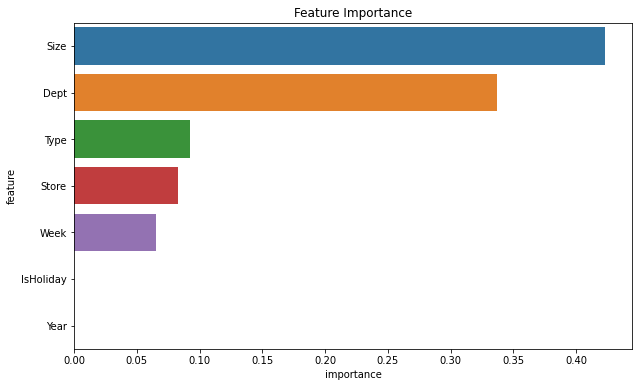

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
# Make and evaluate predictions:
x_pred = model.predict(train_inputs)
x_pred

array([ 4421.1025,  6982.323 ,  7777.918 , ..., 59104.188 , 14766.857 ,
       18813.03  ], dtype=float32)

**Evaluation**

In [ ]:
# calculating mean_squared_error
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(x_pred,train_targets)

14512.11770940201

**Making Predictions**

In [ ]:
x_preds=model.predict(X_test)
x_preds

array([10529.779, 10529.779, 10529.779, ..., 10529.779, 10529.779,
       10529.779], dtype=float32)

In [ ]:
Final = X_test[['Store', 'Dept', 'Week']]
Final['Weekly_Sales'] = x_preds
Final.head()

,Store,Dept,Week,Weekly_Sales
0,1.000,1.000,44.000,10529.779
1,1.000,2.000,44.000,10529.779
2,1.000,3.000,44.000,10529.779
3,1.000,4.000,44.000,10529.779
4,1.000,5.000,44.000,10529.779


**RandomForestRegressor**

**Hyperparameter Tuning**

For hyperparameter tuning,give us the choice to use its search space or schemas as is, or we can customize the schemas to fit our purposes

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
test_params(n_estimators=20, max_depth=20)

(1797.811385410645, 3434.4162052825995)

In [ ]:
test_params(n_estimators=50, max_depth=10,min_samples_split=3, min_samples_leaf=4, max_features=0.4)

(13806.977338643439, 14212.377040662092)

**To plot the graph between training error and validation error**

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

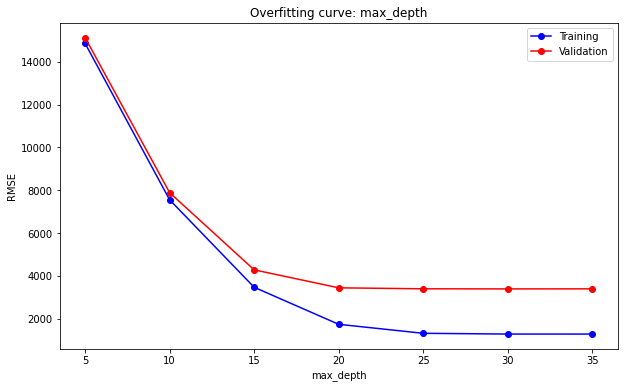

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

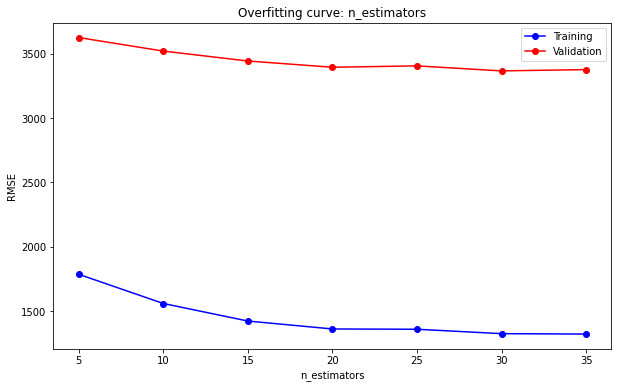

In [ ]:
test_param_and_plot('n_estimators', [5, 10, 15, 20, 25, 30, 35])

**Training the Best Model**

In [ ]:
# fitting the model with Hyperparameter Overfitting
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=58)

We can compute the accuracy of the model on the training and validation sets using RF.score

In [ ]:
RF.score(train_inputs, train_targets)

0.9953390902126223

In [ ]:
RF.score(val_inputs, val_targets)

0.9780149254672493

In [ ]:
# Make and evaluate predictions:
train_preds = RF.predict(train_inputs)
train_preds

array([6.66752586e+00, 1.71897788e+03, 4.93114186e+02, ...,
       6.09312574e+04, 3.50815886e+04, 1.59347800e+04])

**Evaluation**

In [ ]:
rmse(train_targets,train_preds)

1547.3878726380904

**Feature Importance**
Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
# Let's turn this into a dataframe and visualize the most important features.
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': RF.feature_importances_
}).sort_values('importance', ascending=False)

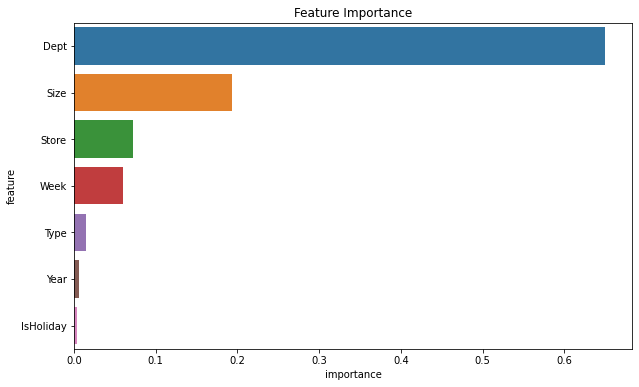

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Making Predictions**

In [ ]:
predict = RF.predict(X_test)
predict

array([2171.97248563, 2171.97248563, 2171.97248563, ..., 2171.97248563,
       2171.97248563, 2171.97248563])

In [ ]:
Final = X_test[['Store', 'Dept', 'Week']]

Final['Weekly_Sales']= predict
Final.head()

,Store,Dept,Week,Weekly_Sales
0,1.000,1.000,44.000,2171.972
1,1.000,2.000,44.000,2171.972
2,1.000,3.000,44.000,2171.972
3,1.000,4.000,44.000,2171.972
4,1.000,5.000,44.000,2171.972
